## SHAP Explanation


In [1]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#import model from data-prediction.ipynb
import joblib
xgb_model = joblib.load('../assets/xgb_model.pkl')

#load data
X = pd.read_csv('../assets/X.csv')
X



,Age,Gender,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,Water_consumption,Monitors_calories,Physical_activity,Screen_time,Alcohol_consumption_freq,Transportation_mode,Obesity_level
0,21,1,1,0,1,1,1,0,1,0,0,1,0,4,1
1,21,1,1,0,3,1,1,1,2,1,4,0,1,4,1
2,23,0,1,0,1,1,1,0,1,0,3,1,2,4,1
3,27,0,0,0,3,1,1,0,1,0,3,0,2,1,2
4,22,0,0,0,1,0,1,0,1,0,0,0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1,1,1,3,1,1,0,1,0,3,1,1,4,6
2107,22,1,1,1,3,1,1,0,1,0,2,1,1,4,6
2108,23,1,1,1,3,1,1,0,1,0,2,1,1,4,6
2109,24,1,1,1,3,1,1,0,2,0,2,1,1,4,6


In [3]:

array_y = X.Obesity_level
array_X = X.drop("Obesity_level", axis=1)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    array_X, array_y, test_size=0.2, random_state=20250928, stratify=array_y
)

print("Shape of training set\t", X_train.shape, y_train.shape)
print("Shape of test set\t", X_test.shape, y_test.shape)

Shape of training set	 (1688, 14) (1688,)
Shape of test set	 (423, 14) (423,)


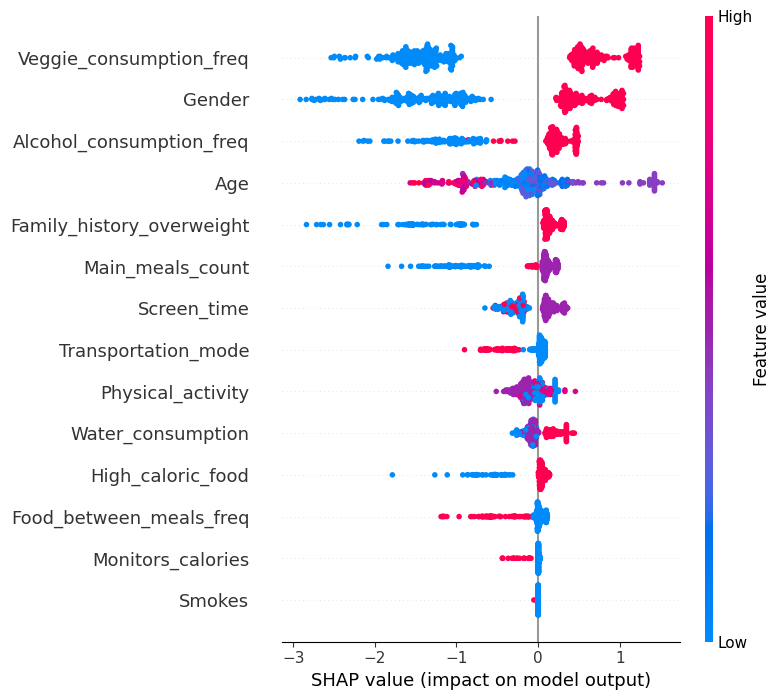

In [4]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
# Plot SHAP values for the most obese class (class 6)
shap.summary_plot(shap_values[:, :, 6], X_test)

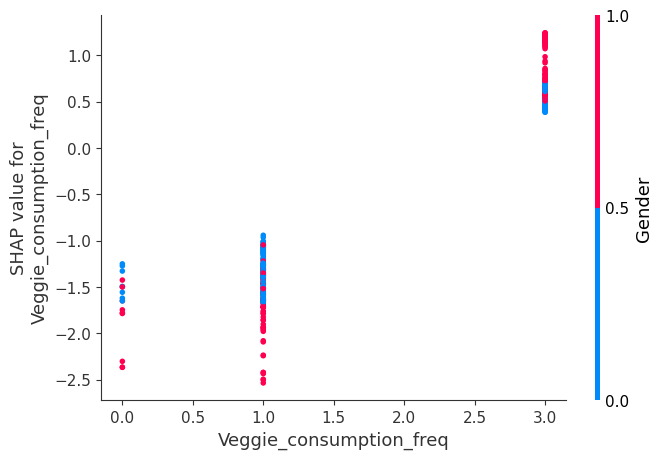

In [5]:
shap.dependence_plot("Veggie_consumption_freq", shap_values[:, :, 6], X_test,interaction_index="Gender")
#Female = 1, Male = 0



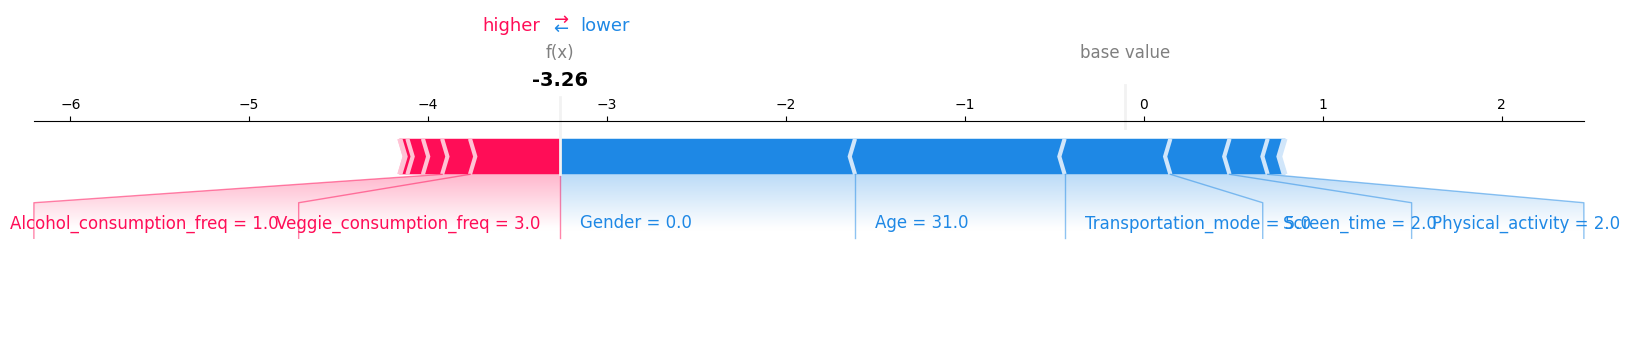

In [6]:
# Show force plot for the first sample and class 6 (most obese)
shap.plots.force(
	explainer.expected_value[6],           # expected value for class 6
	shap_values[0, :, 6],                  # SHAP values for first sample, class 6
	X_test.iloc[0, :],                     # feature values for first sample
	matplotlib=True
)


